In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import geopandas as gpd
import shapely
from shapely import Point, Polygon, LineString
import folium

In [3]:
import xarray as xr

In [4]:
Datos = pd.read_csv("Clima.csv")

# Cómo filtrar los datos

In [5]:
#Mostrar las tres primeras filas del conjunto de datos
Datos.head(3)

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Pais,Dpto,Mpio
0,-75.121691,7.130415,113.776776,255.862711,0.425363,294.603149,2019-06-01,Colombia,Antioquia,Anorí
1,-75.121691,7.130415,132.706988,343.000704,0.428252,294.782715,2019-07-01,Colombia,Antioquia,Anorí
2,-75.121691,7.130415,125.600792,151.470437,0.417310,294.956848,2019-08-01,Colombia,Antioquia,Anorí


In [6]:
#Mostrar las tres últimas filas del conjunto de datos
Datos.tail(3)

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Pais,Dpto,Mpio
6036,-76.020006,4.435469,90.492691,193.768242,0.387352,293.425598,2024-04-01,Colombia,Valle del Cauca,Zarzal
6037,-76.020006,4.435469,91.878198,218.015282,0.412165,293.525177,2024-05-01,Colombia,Valle del Cauca,Zarzal
6038,-76.020006,4.435469,104.826736,143.337739,0.406664,293.093597,2024-06-01,Colombia,Valle del Cauca,Zarzal


In [7]:
#Mostrar la estadística descriptiva de los datos
Datos.describe()

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes
count,6039.000000,6039.000000,6039.000000,6039.000000,6039.000000,6039.000000
mean,-74.672533,4.884627,109.623234,218.686133,0.395818,293.855909
std,1.159816,1.420479,24.260755,144.684977,0.036045,5.134294
min,-76.469164,2.638839,41.005077,4.907485,0.189188,281.081177
25%,-75.570848,3.537154,90.593683,107.424470,0.379845,290.056000
50%,-74.672533,4.884627,109.617663,192.177179,0.408194,294.708557
75%,-73.774218,6.232100,127.362546,294.805913,0.422605,298.227020
max,-72.875902,7.130415,194.015450,1077.196858,0.438700,304.543182


In [8]:
#Mostrar la información de los datos
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6039 entries, 0 to 6038
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   x                         6039 non-null   float64
 1   y                         6039 non-null   float64
 2   Evap_mm_Mes               6039 non-null   float64
 3   Prec_mm_Mes               6039 non-null   float64
 4   HumedadSuelo_FracVol_Mes  6039 non-null   float64
 5   Taire_Kelvin_Mes          6039 non-null   float64
 6   Fecha                     6039 non-null   object 
 7   Pais                      6039 non-null   object 
 8   Dpto                      6039 non-null   object 
 9   Mpio                      6039 non-null   object 
dtypes: float64(6), object(4)
memory usage: 471.9+ KB


In [9]:
#Mostrar los nombres de las variables que contiene el conjunto de datos
Datos.columns

Index(['x', 'y', 'Evap_mm_Mes', 'Prec_mm_Mes', 'HumedadSuelo_FracVol_Mes',
       'Taire_Kelvin_Mes', 'Fecha', 'Pais', 'Dpto', 'Mpio'],
      dtype='object')

In [10]:
#Filtrar por municipio y el municipio de Anorí
Datos[Datos['Mpio'].str.contains('Anorí')]

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Pais,Dpto,Mpio
0,-75.121691,7.130415,113.776776,255.862711,0.425363,294.603149,2019-06-01,Colombia,Antioquia,Anorí
1,-75.121691,7.130415,132.706988,343.000704,0.428252,294.782715,2019-07-01,Colombia,Antioquia,Anorí
2,-75.121691,7.130415,125.600792,151.470437,0.417310,294.956848,2019-08-01,Colombia,Antioquia,Anorí
3,-75.121691,7.130415,111.806387,303.580844,0.424835,294.434052,2019-09-01,Colombia,Antioquia,Anorí
4,-75.121691,7.130415,95.319894,307.346043,0.428159,293.333862,2019-10-01,Colombia,Antioquia,Anorí
...,...,...,...,...,...,...,...,...,...,...
56,-75.121691,7.130415,119.098366,88.762343,0.343664,296.466400,2024-02-01,Colombia,Antioquia,Anorí
57,-75.121691,7.130415,97.945729,60.327864,0.311110,297.374817,2024-03-01,Colombia,Antioquia,Anorí
58,-75.121691,7.130415,99.526127,222.373190,0.367660,296.006439,2024-04-01,Colombia,Antioquia,Anorí
59,-75.121691,7.130415,100.457700,354.118591,0.417973,295.134888,2024-05-01,Colombia,Antioquia,Anorí


In [11]:
#Filtrar por fecha y fechas del año 2020
Datos[Datos['Fecha'].str.contains('2020-')]

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Pais,Dpto,Mpio
7,-75.121691,7.130415,122.295976,32.164272,0.376282,294.402527,2020-01-01,Colombia,Antioquia,Anorí
8,-75.121691,7.130415,113.304521,27.106566,0.332185,295.425537,2020-02-01,Colombia,Antioquia,Anorí
9,-75.121691,7.130415,88.652035,54.774182,0.307729,295.030457,2020-03-01,Colombia,Antioquia,Anorí
10,-75.121691,7.130415,101.937796,217.428400,0.381701,295.167908,2020-04-01,Colombia,Antioquia,Anorí
11,-75.121691,7.130415,107.836791,266.419119,0.403017,295.642761,2020-05-01,Colombia,Antioquia,Anorí
...,...,...,...,...,...,...,...,...,...,...
5992,-76.020006,4.435469,98.998049,132.465316,0.391122,292.539154,2020-08-01,Colombia,Valle del Cauca,Zarzal
5993,-76.020006,4.435469,91.604531,99.747611,0.396498,292.421906,2020-09-01,Colombia,Valle del Cauca,Zarzal
5994,-76.020006,4.435469,92.291198,149.618974,0.397507,292.483734,2020-10-01,Colombia,Valle del Cauca,Zarzal
5995,-76.020006,4.435469,84.885855,149.888332,0.403375,291.499481,2020-11-01,Colombia,Valle del Cauca,Zarzal


In [12]:
#Filtrar por fecha y fechas del año 2020, y el municipio de Anorí
Datos[Datos['Fecha'].str.contains('2020-')& Datos['Mpio'].str.contains('Anorí')] 

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Pais,Dpto,Mpio
7,-75.121691,7.130415,122.295976,32.164272,0.376282,294.402527,2020-01-01,Colombia,Antioquia,Anorí
8,-75.121691,7.130415,113.304521,27.106566,0.332185,295.425537,2020-02-01,Colombia,Antioquia,Anorí
9,-75.121691,7.130415,88.652035,54.774182,0.307729,295.030457,2020-03-01,Colombia,Antioquia,Anorí
10,-75.121691,7.130415,101.937796,217.428400,0.381701,295.167908,2020-04-01,Colombia,Antioquia,Anorí
11,-75.121691,7.130415,107.836791,266.419119,0.403017,295.642761,2020-05-01,Colombia,Antioquia,Anorí
12,-75.121691,7.130415,127.186970,295.013619,0.424556,294.813293,2020-06-01,Colombia,Antioquia,Anorí
13,-75.121691,7.130415,121.131170,373.904128,0.429265,294.315918,2020-07-01,Colombia,Antioquia,Anorí
14,-75.121691,7.130415,121.044191,277.326196,0.426227,294.678192,2020-08-01,Colombia,Antioquia,Anorí
15,-75.121691,7.130415,114.472448,345.286827,0.429121,294.070129,2020-09-01,Colombia,Antioquia,Anorí
16,-75.121691,7.130415,108.210912,410.694702,0.429839,294.320068,2020-10-01,Colombia,Antioquia,Anorí


In [13]:
#Filtrar por fecha y calcular el promedio de cada variable
Datos.groupby(['Fecha']).mean()

C:\Users\valiz\AppData\Local\Temp\ipykernel_21684\2233414344.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Datos.groupby(['Fecha']).mean()


,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes
Fecha,,,,,,
2019-06-01,-74.672533,4.884627,111.619641,214.019287,0.410132,293.460642
2019-07-01,-74.672533,4.884627,114.888114,182.219830,0.393206,293.267272
2019-08-01,-74.672533,4.884627,110.126781,134.584346,0.370729,293.767482
2019-09-01,-74.672533,4.884627,107.469075,234.793552,0.379450,294.029072
2019-10-01,-74.672533,4.884627,105.564129,274.281840,0.405042,293.185232
...,...,...,...,...,...,...
2024-02-01,-74.672533,4.884627,102.413408,132.838072,0.356841,295.430697
2024-03-01,-74.672533,4.884627,95.927428,143.278481,0.348331,295.792001
2024-04-01,-74.672533,4.884627,108.142339,279.655923,0.389334,294.991679


In [14]:
#Indexar variables x,y, Fecha
Datos_idx = Datos.set_index(["x","y","Fecha"])
Datos_idx.head(5)

Evap_mm_Mes  Prec_mm_Mes  \
x          y        Fecha                                  
-75.121691 7.130415 2019-06-01   113.776776   255.862711   
                    2019-07-01   132.706988   343.000704   
                    2019-08-01   125.600792   151.470437   
                    2019-09-01   111.806387   303.580844   
                    2019-10-01    95.319894   307.346043   

                                HumedadSuelo_FracVol_Mes  Taire_Kelvin_Mes  \
x          y        Fecha                                                    
-75.121691 7.130415 2019-06-01                  0.425363        294.603149   
                    2019-07-01                  0.428252        294.782715   
                    2019-08-01                  0.417310        294.956848   
                    2019-09-01                  0.424835        294.434052   
                    2019-10-01                  0.428159        293.333862   

                                    Pais       Dpto   Mpio  
x          y        Fecha                                   
-75.121691 7.130415 2019-06-01  Colombia  Antioquia  Anorí  
                    2019-07-01  Colombia  Antioquia  Anorí  
                    2019-08-01  Colombia  Antioquia  Anorí  
                    2019-09-01  Colombia  Antioquia  Anorí  
                    2019-10-01  Colombia  Antioquia  Anorí

In [15]:
#Estimar el promedio de los datos tomando como referencia el primer índice (x)
Datos_idx.groupby(level=0).mean()

C:\Users\valiz\AppData\Local\Temp\ipykernel_21684\2445830674.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Datos_idx.groupby(level=0).mean()


,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes
x,,,,
-76.469164,98.896605,360.211182,0.417434,296.199511
-76.020006,87.129554,215.830610,0.404991,290.357423
-75.570848,103.435686,180.390826,0.390508,290.933068
-75.121691,119.873769,209.264233,0.382935,295.178959
-74.672533,124.090265,189.564130,0.388355,296.377989
-74.223375,118.363023,202.980639,0.399185,294.471006
-73.774218,113.142807,208.364555,0.396042,293.581341
-73.325060,112.493687,205.776640,0.394138,293.962904
-72.875902,109.183708,195.792382,0.388780,293.640982


In [16]:
#Estimar el promedio de los datos tomando como referencia el índice Fecha
Datos_idx.groupby(level="Fecha").mean()

C:\Users\valiz\AppData\Local\Temp\ipykernel_21684\2023375306.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Datos_idx.groupby(level="Fecha").mean()


,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes
Fecha,,,,
2019-06-01,111.619641,214.019287,0.410132,293.460642
2019-07-01,114.888114,182.219830,0.393206,293.267272
2019-08-01,110.126781,134.584346,0.370729,293.767482
2019-09-01,107.469075,234.793552,0.379450,294.029072
2019-10-01,105.564129,274.281840,0.405042,293.185232
...,...,...,...,...
2024-02-01,102.413408,132.838072,0.356841,295.430697
2024-03-01,95.927428,143.278481,0.348331,295.792001
2024-04-01,108.142339,279.655923,0.389334,294.991679


In [17]:
#También podemos optar por incluir NA en las claves de grupo o no configurando el parámetro dropna, la configuración predeterminada es Verdadero
Datos_idx.groupby(by=["Fecha"], dropna=False).max()

,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Pais,Dpto,Mpio
Fecha,,,,,,,
2019-06-01,149.494116,718.618764,0.435578,300.560822,Colombia,Valle del Cauca,Zarzal
2019-07-01,162.176078,737.472313,0.435131,300.645630,Colombia,Valle del Cauca,Zarzal
2019-08-01,165.807772,818.018571,0.434197,301.951721,Colombia,Valle del Cauca,Zarzal
2019-09-01,158.410106,940.209294,0.436088,302.168030,Colombia,Valle del Cauca,Zarzal
2019-10-01,156.159778,745.927457,0.436586,301.053680,Colombia,Valle del Cauca,Zarzal
...,...,...,...,...,...,...,...
2024-02-01,141.537215,557.428328,0.425650,303.768494,Colombia,Valle del Cauca,Zarzal
2024-03-01,136.955871,727.715576,0.431524,304.521240,Colombia,Valle del Cauca,Zarzal
2024-04-01,143.844233,831.290075,0.437590,302.850037,Colombia,Valle del Cauca,Zarzal


In [18]:
#Estimar máximos tomando como referencia la Fecha y el departamento como índices
Datos_idx.groupby(by=["Fecha", "Dpto"], dropna=False).max()

Evap_mm_Mes  Prec_mm_Mes  \
Fecha      Dpto                                        
2019-06-01 Antioquia         149.494116   550.358738   
           Bolívar           123.931755   252.073938   
           Boyacá            133.613714   204.340303   
           Caldas            133.951305   135.903683   
           Caquetá           121.013394   150.076227   
...                                 ...          ...   
2024-06-01 Meta              145.671273   488.249728   
           Risaralda          97.827783   303.217445   
           Santander         129.617838   437.191767   
           Tolima            158.878872   231.294762   
           Valle del Cauca   104.826736   274.662285   

                            HumedadSuelo_FracVol_Mes  Taire_Kelvin_Mes  \
Fecha      Dpto                                                          
2019-06-01 Antioquia                        0.434188        300.560822   
           Bolívar                          0.426249        299.812714   
           Boyacá                           0.417355        297.185333   
           Caldas                           0.414912        294.866150   
           Caquetá                          0.400626        294.963379   
...                                              ...               ...   
2024-06-01 Meta                             0.426412        298.823975   
           Risaralda                        0.427107        296.168823   
           Santander                        0.430605        300.500061   
           Tolima                           0.416482        300.460754   
           Valle del Cauca                  0.424142        293.093597   

                                Pais                    Mpio  
Fecha      Dpto                                               
2019-06-01 Antioquia        Colombia                 Yolombó  
           Bolívar          Colombia              Cantagallo  
           Boyacá           Colombia               Sotaquirá  
           Caldas           Colombia             Pensilvania  
           Caquetá          Colombia  San Vicente del Caguán  
...                              ...                     ...  
2024-06-01 Meta             Colombia           Vista Hermosa  
           Risaralda        Colombia     Santa Rosa de Cabal  
           Santander        Colombia                    Tona  
           Tolima           Colombia                San Luís  
           Valle del Cauca  Colombia                  Zarzal  

[915 rows x 6 columns]

In [19]:
#Agrupar indexando una variable y seleccionando una variable de interés para filtrar
Datos_idx.groupby("Prec_mm_Mes", group_keys=True)[['Mpio']].apply(lambda x: x)

,,,,Mpio
Prec_mm_Mes,x,y,Fecha,
4.907485,-73.774218,3.087996,2024-01-01,Vista Hermosa
5.630772,-73.325060,3.087996,2024-01-01,Puerto Lleras
5.732942,-75.121691,4.435469,2019-08-01,Ibagué
7.252392,-73.325060,3.537154,2024-01-01,San Martín
7.722490,-72.875902,5.782942,2024-01-01,Nobsa
...,...,...,...,...
940.209294,-76.469164,5.333784,2019-09-01,Tadó
964.820280,-76.469164,5.782942,2022-02-01,Quibdó
972.116483,-76.469164,5.333784,2022-02-01,Tadó


In [20]:
#Funciones lamda, pasaremos las temperaturas en Kelvin a Celsius
Datos_idx.groupby("Prec_mm_Mes", group_keys=True)[['Taire_Kelvin_Mes']].apply(lambda x: x-273.3)

,,,,Taire_Kelvin_Mes
Prec_mm_Mes,x,y,Fecha,
4.907485,-73.774218,3.087996,2024-01-01,24.930530
5.630772,-73.325060,3.087996,2024-01-01,26.249133
5.732942,-75.121691,4.435469,2019-08-01,23.487964
7.252392,-73.325060,3.537154,2024-01-01,26.341541
7.722490,-72.875902,5.782942,2024-01-01,11.775439
...,...,...,...,...
940.209294,-76.469164,5.333784,2019-09-01,26.018207
964.820280,-76.469164,5.782942,2022-02-01,25.807605
972.116483,-76.469164,5.333784,2022-02-01,25.691394


In [21]:
#Funciones lamda, filtraremos temperaturas menores a 300K
Datos_idx.groupby("Prec_mm_Mes", group_keys=True)[['Taire_Kelvin_Mes']].apply(lambda x: x<300.0)

,,,,Taire_Kelvin_Mes
Prec_mm_Mes,x,y,Fecha,
4.907485,-73.774218,3.087996,2024-01-01,True
5.630772,-73.325060,3.087996,2024-01-01,True
5.732942,-75.121691,4.435469,2019-08-01,True
7.252392,-73.325060,3.537154,2024-01-01,True
7.722490,-72.875902,5.782942,2024-01-01,True
...,...,...,...,...
940.209294,-76.469164,5.333784,2019-09-01,True
964.820280,-76.469164,5.782942,2022-02-01,True
972.116483,-76.469164,5.333784,2022-02-01,True


In [22]:
#Función apply
Datos_idx.groupby("Prec_mm_Mes", group_keys=True)[['Taire_Kelvin_Mes']].apply(np.mean)

C:\Users\valiz\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\valiz\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\valiz\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\valiz\anaconda3\Lib\si

,Taire_Kelvin_Mes
Prec_mm_Mes,
4.907485,298.230530
5.630772,299.549133
5.732942,296.787964
7.252392,299.641541
7.722490,285.075439
...,...
940.209294,299.318207
964.820280,299.107605
972.116483,298.991394


In [23]:
#Función apply, maximo por filas
Datos_idx.groupby("Fecha", group_keys=True)[['Taire_Kelvin_Mes','Prec_mm_Mes']].apply(np.max, axis=0)

,Taire_Kelvin_Mes,Prec_mm_Mes
Fecha,,
2019-06-01,300.560822,718.618764
2019-07-01,300.645630,737.472313
2019-08-01,301.951721,818.018571
2019-09-01,302.168030,940.209294
2019-10-01,301.053680,745.927457
...,...,...
2024-02-01,303.768494,557.428328
2024-03-01,304.521240,727.715576
2024-04-01,302.850037,831.290075


In [24]:
#Asignar formato de fecha a la variable Fecha
Datos["Fecha"] = pd.to_datetime(Datos["Fecha"])

In [25]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6039 entries, 0 to 6038
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   x                         6039 non-null   float64       
 1   y                         6039 non-null   float64       
 2   Evap_mm_Mes               6039 non-null   float64       
 3   Prec_mm_Mes               6039 non-null   float64       
 4   HumedadSuelo_FracVol_Mes  6039 non-null   float64       
 5   Taire_Kelvin_Mes          6039 non-null   float64       
 6   Fecha                     6039 non-null   datetime64[ns]
 7   Pais                      6039 non-null   object        
 8   Dpto                      6039 non-null   object        
 9   Mpio                      6039 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 471.9+ KB


In [26]:
# D: días, M: mes, W: semanas, Y: años --> https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
# Estimar el promedio anual de los datos
Datos.groupby(pd.Grouper(key='Fecha', axis=0, freq='Y')).mean() 

C:\Users\valiz\AppData\Local\Temp\ipykernel_21684\3415058439.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Datos.groupby(pd.Grouper(key='Fecha', axis=0, freq='Y')).mean()


,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes
Fecha,,,,,,
2019-12-31,-74.672533,4.884627,107.151172,210.975240,0.396156,293.555907
2020-12-31,-74.672533,4.884627,108.453224,196.749758,0.388406,294.002325
2021-12-31,-74.672533,4.884627,113.249795,211.514880,0.398618,293.948054
2022-12-31,-74.672533,4.884627,107.735226,243.427256,0.404161,293.185633
2023-12-31,-74.672533,4.884627,111.062036,235.906292,0.399537,293.906916
2024-12-31,-74.672533,4.884627,108.492614,201.974868,0.380527,294.967331


In [27]:
# Estimar el promedio mensual de los datos
Datos.groupby(pd.Grouper(key='Fecha',  freq='M')).mean() 

C:\Users\valiz\AppData\Local\Temp\ipykernel_21684\4044185887.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Datos.groupby(pd.Grouper(key='Fecha',  freq='M')).mean()


,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes
Fecha,,,,,,
2019-06-30,-74.672533,4.884627,111.619641,214.019287,0.410132,293.460642
2019-07-31,-74.672533,4.884627,114.888114,182.219830,0.393206,293.267272
2019-08-31,-74.672533,4.884627,110.126781,134.584346,0.370729,293.767482
2019-09-30,-74.672533,4.884627,107.469075,234.793552,0.379450,294.029072
2019-10-31,-74.672533,4.884627,105.564129,274.281840,0.405042,293.185232
...,...,...,...,...,...,...
2024-02-29,-74.672533,4.884627,102.413408,132.838072,0.356841,295.430697
2024-03-31,-74.672533,4.884627,95.927428,143.278481,0.348331,295.792001
2024-04-30,-74.672533,4.884627,108.142339,279.655923,0.389334,294.991679


In [28]:
# Estimar el promedio anual de la evaporación 
Datos.groupby(pd.Grouper(key=('Fecha'), freq='Y'))['Evap_mm_Mes'].mean() 

Fecha
2019-12-31    107.151172
2020-12-31    108.453224
2021-12-31    113.249795
2022-12-31    107.735226
2023-12-31    111.062036
2024-12-31    108.492614
Freq: A-DEC, Name: Evap_mm_Mes, dtype: float64

In [29]:
# Crear una variable que se llame año
Datos.insert(7,"Año",Datos.Fecha.dt.year)

In [30]:
# Crear una variable que se llame año
Datos.insert(8,"Mes",Datos.Fecha.dt.month)

In [31]:
# Crear una variable que se llame año
Datos.insert(9,"Día",Datos.Fecha.dt.day)

In [32]:
Datos.head()

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Año,Mes,Día,Pais,Dpto,Mpio
0,-75.121691,7.130415,113.776776,255.862711,0.425363,294.603149,2019-06-01,2019,6,1,Colombia,Antioquia,Anorí
1,-75.121691,7.130415,132.706988,343.000704,0.428252,294.782715,2019-07-01,2019,7,1,Colombia,Antioquia,Anorí
2,-75.121691,7.130415,125.600792,151.470437,0.417310,294.956848,2019-08-01,2019,8,1,Colombia,Antioquia,Anorí
3,-75.121691,7.130415,111.806387,303.580844,0.424835,294.434052,2019-09-01,2019,9,1,Colombia,Antioquia,Anorí
4,-75.121691,7.130415,95.319894,307.346043,0.428159,293.333862,2019-10-01,2019,10,1,Colombia,Antioquia,Anorí


# Gráficos

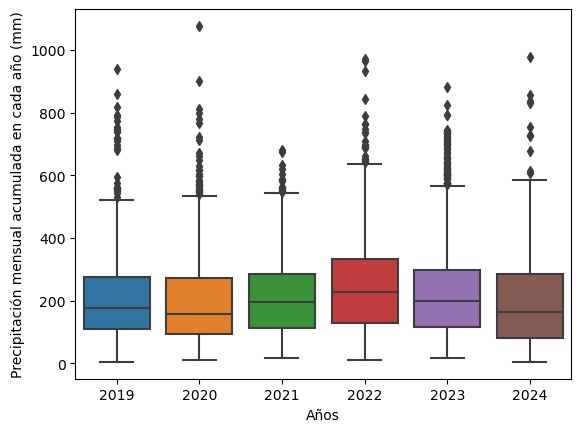

In [33]:
#Boxplot de precipitaciones para los datos por años
sns.boxplot(x='Año', y='Prec_mm_Mes', data=Datos)
plt.ylabel("Precipitación mensual acumulada en cada año (mm)")
plt.xlabel("Años")
plt.show()

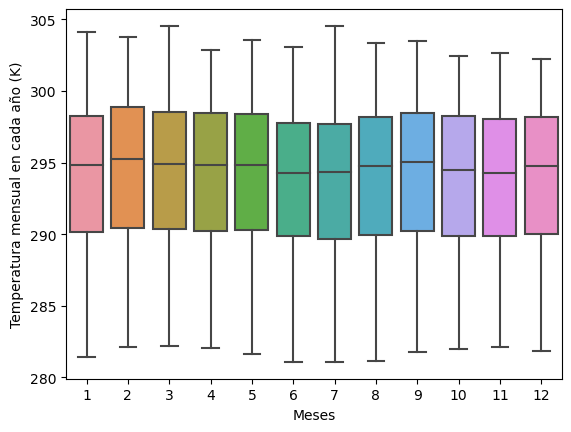

In [34]:
#Boxplot de temperatura para los datos por meses
sns.boxplot(x='Mes', y='Taire_Kelvin_Mes', data=Datos)
plt.ylabel("Temperatura mensual en cada año (K)")
plt.xlabel("Meses")
plt.show()

In [35]:
#Filtraremos los municipios que tenemos
np.unique(Datos.Mpio)

array(['Acacías', 'Albania', 'Algeciras', 'Anorí', 'Ansermanuevo',
       'Aquitania', 'Barranca de Upía', 'Barrancabermeja', 'Betulia',
       'Bolívar', 'Briceño', 'Cajamarca', 'Calima', 'Cantagallo',
       'Cañasgordas', 'Chaparral', 'Chivor', 'Cimitarra',
       'Ciudad Bolívar', 'Colombia', 'Coromoro', 'Cunday', 'Dabeiba',
       'El Calvario', 'El Castillo', 'El Rosal', 'Filadelfia', 'Frontino',
       'Galán', 'Guaduas', 'Guatapé', 'Guatavita', 'Ibagué', 'La Uribe',
       'Landázuri', 'Lebríja', 'Mapiripán', 'Medellín', 'Medina',
       'Mesetas', 'Molagavita', 'Monterrey', 'Murillo', 'Natagaima',
       'Neiva', 'Nobsa', 'Oiba', 'Otanche', 'Palmira', 'Pensilvania',
       'Planadas', 'Pueblo Rico', 'Puerto Concordia', 'Puerto Lleras',
       'Puerto López', 'Puerto Nare', 'Puerto Rico', 'Páez', 'Quibdó',
       'Ramiriquí', 'San Antonio', 'San José del Palmar',
       'San Juan de Río Seco', 'San Luis de Cubarral', 'San Luís',
       'San Martín', 'San Vicente del Caguán', 'S

In [36]:
Datos[Datos.Mpio == "Tuluá"]

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Año,Mes,Día,Pais,Dpto,Mpio
5856,-76.020006,3.986312,100.978848,76.942274,0.383511,291.066406,2019-06-01,2019,6,1,Colombia,Valle del Cauca,Tuluá
5857,-76.020006,3.986312,95.906758,53.354517,0.351125,290.815735,2019-07-01,2019,7,1,Colombia,Valle del Cauca,Tuluá
5858,-76.020006,3.986312,74.717581,17.689941,0.300463,291.312378,2019-08-01,2019,8,1,Colombia,Valle del Cauca,Tuluá
5859,-76.020006,3.986312,65.598717,82.393356,0.318175,291.251526,2019-09-01,2019,9,1,Colombia,Valle del Cauca,Tuluá
5860,-76.020006,3.986312,70.633660,142.702379,0.376829,290.417389,2019-10-01,2019,10,1,Colombia,Valle del Cauca,Tuluá
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,-76.020006,3.986312,78.687969,98.488065,0.353825,292.203033,2024-02-01,2024,2,1,Colombia,Valle del Cauca,Tuluá
5913,-76.020006,3.986312,78.690977,80.104584,0.345195,292.352600,2024-03-01,2024,3,1,Colombia,Valle del Cauca,Tuluá
5914,-76.020006,3.986312,92.243729,185.406810,0.380998,291.975281,2024-04-01,2024,4,1,Colombia,Valle del Cauca,Tuluá
5915,-76.020006,3.986312,96.103083,165.080143,0.404522,291.985474,2024-05-01,2024,5,1,Colombia,Valle del Cauca,Tuluá


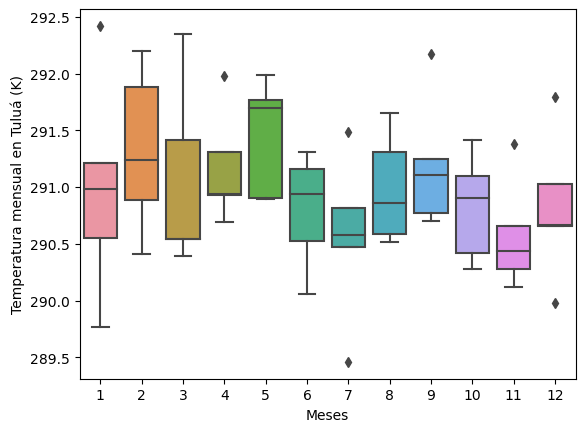

In [37]:
#Boxplot de las temperaturas mensuales de Tuluá
Tulua = Datos[Datos.Mpio == "Tuluá"]

sns.boxplot(x="Mes", y='Taire_Kelvin_Mes', data=Tulua)
plt.ylabel("Temperatura mensual en Tuluá (K)")
plt.xlabel("Meses")
plt.show()

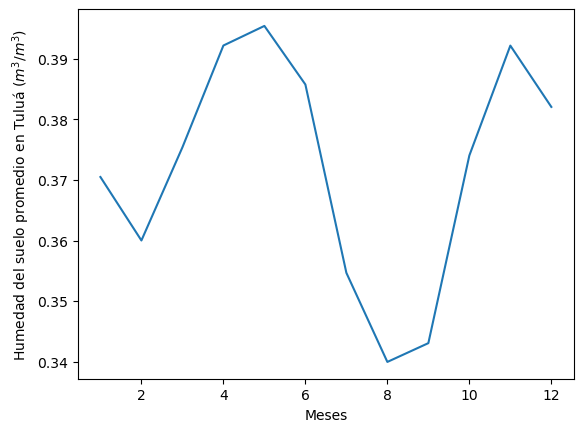

In [38]:
#Boxplot de la humedad del suelo promedio mensuales de Tuluá

Tulua_mes_evap = Tulua.groupby("Mes", group_keys=True)[['HumedadSuelo_FracVol_Mes']].apply(np.mean, axis=0)

plt.plot(Tulua_mes_evap.index, Tulua_mes_evap['HumedadSuelo_FracVol_Mes'] )
plt.ylabel("Humedad del suelo promedio en Tuluá ($m^3/m^3$)")
plt.xlabel("Meses")
plt.show()

In [39]:
import matplotlib.gridspec as gridspec
from pylab import* # matrices de graficas!!!

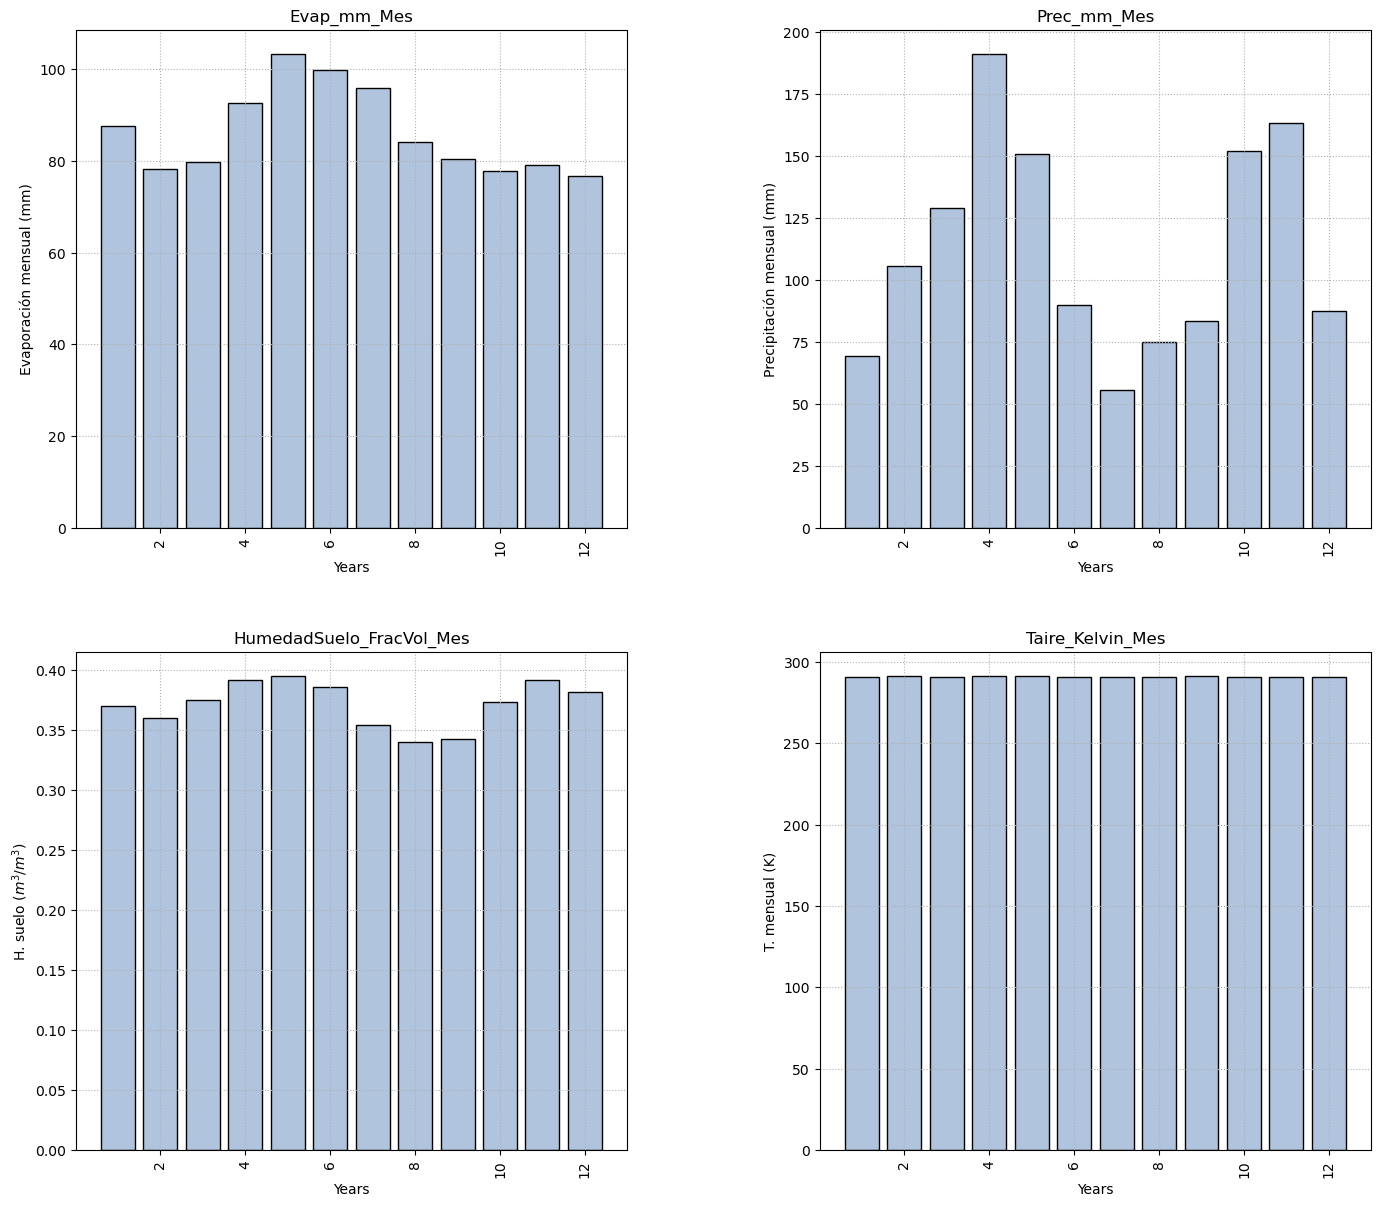

In [40]:
mat_me = np.ones([4,12]) #Creamos una matriz de unos con 4 filas que corresponden a las variables y 12 columnas que corresponden a los meses
meses = np.arange(1,13) #Creamos una enumeración de los meses

for i,mes in enumerate(meses):
    z = Tulua[Tulua.Mes == mes] #Filtramos los datos mes por mes, el iterador es "mes"
    for j,sta in enumerate(Tulua.columns[2:6]): #Estimamos el promedio de cada variable mes por mes
        zl = z[sta].mean()
        mat_me[j,i] = zl #Cada valor promedio mensual de cada variable y cada mes se reasigna a la matriz

fig = plt.figure(figsize=(14,14)) #tamaño de la figura
gs = gridspec.GridSpec(2,2, left=0.05, right=0.975, hspace=0.25, wspace=0.35, top=0.9, bottom=0.1) #Dimensiones de la figura
Nombres = Tulua.columns[2:6] #Nombres de cada variable para poner al titulo
Etiquetas = ["Evaporación mensual (mm)", "Precipitación mensual (mm)", "H. suelo ($m^3/m^3$)", "T. mensual (K)"] #Etiquetas del eje y para cada gráfica
for i in range (4):   
    ax = subplot (gs[i])
    plt.xlabel("Years")
    plt.xticks(rotation=90)
    plt.grid(linestyle=":")
    plt.ylabel(Etiquetas[i])
    plt.title(Nombres[i])
    plt.bar(meses,np.nan_to_num(mat_me[i,:]), color = 'lightsteelblue', edgecolor ='k')

#### Ahora intentalo tu mismo con otros municipios y dptos, crea un gráfico de líneas que muestre la humedad del suelo promedio mensual de todos los departamentos

# GEOPANDAS

In [41]:
Datos_filtro = Datos.groupby(by=["x", "y","Año"], dropna=False).mean()
Datos_filtro

C:\Users\valiz\AppData\Local\Temp\ipykernel_21684\285170325.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Datos_filtro = Datos.groupby(by=["x", "y","Año"], dropna=False).mean()


Evap_mm_Mes  Prec_mm_Mes  HumedadSuelo_FracVol_Mes  \
x          y        Año                                                        
-76.469164 2.638839 2019    93.864756   153.247946                  0.379176   
                    2020    98.022194   152.107844                  0.401138   
                    2021    99.114700   196.176231                  0.409019   
                    2022   102.588901   224.734097                  0.414566   
                    2023   103.889290   222.429383                  0.402408   
...                               ...          ...                       ...   
-72.875902 7.130415 2020    82.500336    92.616059                  0.346022   
                    2021    87.870994   101.006407                  0.352798   
                    2022    87.136511   119.585912                  0.371797   
                    2023    94.851336   120.550293                  0.371144   
                    2024    82.346680    97.549930                  0.332336   

                          Taire_Kelvin_Mes  Mes  Día  
x          y        Año                               
-76.469164 2.638839 2019        290.317004  9.0  1.0  
                    2020        290.457364  6.5  1.0  
                    2021        290.017660  6.5  1.0  
                    2022        289.726730  6.5  1.0  
                    2023        290.576770  6.5  1.0  
...                                    ...  ...  ...  
-72.875902 7.130415 2020        291.042557  6.5  1.0  
                    2021        291.356082  6.5  1.0  
                    2022        290.108297  6.5  1.0  
                    2023        291.081629  6.5  1.0  
                    2024        292.054565  3.5  1.0  

[594 rows x 6 columns]

In [42]:
#Volver a pasar lo indices al dataframe
Datos_filtro = Datos_filtro.reset_index()
Datos_filtro

,x,y,Año,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Mes,Día
0,-76.469164,2.638839,2019,93.864756,153.247946,0.379176,290.317004,9.0,1.0
1,-76.469164,2.638839,2020,98.022194,152.107844,0.401138,290.457364,6.5,1.0
2,-76.469164,2.638839,2021,99.114700,196.176231,0.409019,290.017660,6.5,1.0
3,-76.469164,2.638839,2022,102.588901,224.734097,0.414566,289.726730,6.5,1.0
4,-76.469164,2.638839,2023,103.889290,222.429383,0.402408,290.576770,6.5,1.0
...,...,...,...,...,...,...,...,...,...
589,-72.875902,7.130415,2020,82.500336,92.616059,0.346022,291.042557,6.5,1.0
590,-72.875902,7.130415,2021,87.870994,101.006407,0.352798,291.356082,6.5,1.0
591,-72.875902,7.130415,2022,87.136511,119.585912,0.371797,290.108297,6.5,1.0
592,-72.875902,7.130415,2023,94.851336,120.550293,0.371144,291.081629,6.5,1.0


In [43]:
Datos_filtro_2020 = Datos_filtro[Datos_filtro.Año == 2020]
Datos_filtro_2020 = Datos_filtro_2020.reset_index(drop=True)
Datos_filtro_2020 

,x,y,Año,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Mes,Día
0,-76.469164,2.638839,2020,98.022194,152.107844,0.401138,290.457364,6.5,1.0
1,-76.469164,3.087996,2020,102.241928,166.012796,0.406720,293.242704,6.5,1.0
2,-76.469164,3.537154,2020,80.534525,124.339981,0.392204,291.513028,6.5,1.0
3,-76.469164,3.986312,2020,83.427224,106.783131,0.375658,292.460749,6.5,1.0
4,-76.469164,4.435469,2020,108.610893,248.733761,0.417307,297.788048,6.5,1.0
...,...,...,...,...,...,...,...,...,...
94,-72.875902,5.333784,2020,86.593102,135.012950,0.383806,285.118045,6.5,1.0
95,-72.875902,5.782942,2020,70.118598,81.332024,0.356950,284.385539,6.5,1.0
96,-72.875902,6.232100,2020,100.119403,148.776965,0.399639,287.185117,6.5,1.0
97,-72.875902,6.681257,2020,103.838096,136.756496,0.366930,293.438502,6.5,1.0


In [44]:
#Pasar los datos a geopandas
Datos_gdf = gpd.GeoDataFrame(Datos_filtro_2020, geometry=gpd.points_from_xy(Datos_filtro_2020.x, Datos_filtro_2020.y),crs="EPSG:4326")

In [45]:
Datos_gdf.head()

,x,y,Año,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Mes,Día,geometry
0,-76.469164,2.638839,2020,98.022194,152.107844,0.401138,290.457364,6.5,1.0,POINT (-76.46916 2.63884)
1,-76.469164,3.087996,2020,102.241928,166.012796,0.406720,293.242704,6.5,1.0,POINT (-76.46916 3.08800)
2,-76.469164,3.537154,2020,80.534525,124.339981,0.392204,291.513028,6.5,1.0,POINT (-76.46916 3.53715)
3,-76.469164,3.986312,2020,83.427224,106.783131,0.375658,292.460749,6.5,1.0,POINT (-76.46916 3.98631)
4,-76.469164,4.435469,2020,108.610893,248.733761,0.417307,297.788048,6.5,1.0,POINT (-76.46916 4.43547)


In [46]:
Datos_gdf.explore(column="Evap_mm_Mes",cmap="Set1", style_kwds=dict(marker_type="circle_marker"))

#### Visualiza los demas años para la misma variable mostrada en el gráfico anterior

# Arreglos multidimensionales

In [47]:
latitudes = np.array(np.unique(Datos.y))
latitudes

array([2.63883862, 3.08799626, 3.5371539 , 3.98631155, 4.43546919,
       4.88462683, 5.33378447, 5.78294211, 6.23209976, 6.6812574 ,
       7.13041504])

In [48]:
longitudes = np.array(np.unique(Datos.x))
longitudes

array([-76.4691635 , -76.02000586, -75.57084822, -75.12169058,
       -74.67253294, -74.22337529, -73.77421765, -73.32506001,
       -72.87590237])

In [49]:
fechas = pd.date_range("2019-06-01", periods=61, freq="M")
fechas

DatetimeIndex(['2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
      

In [50]:
precipitaciones = np.array(Datos.Prec_mm_Mes)
precipitaciones= precipitaciones.reshape(61,11,9)
precipitaciones

array([[[255.86271146, 343.00070442, 151.47043671, ...,  97.83527011,
          32.1642723 ,  27.10656644],
        [ 54.77418238, 217.42839972, 266.4191192 , ..., 345.2868266 ,
         410.69470206, 340.39593581],
        [100.34447873,  67.37804337,  81.11179224, ..., 324.26755317,
         310.50548237, 354.7713859 ],
        ...,
        [240.6022707 , 227.029962  , 376.18911825, ..., 224.5335211 ,
         178.61841107, 108.55018068],
        [109.93110447, 272.15675404, 300.85069919, ..., 240.25014904,
         209.86512979, 289.98662112],
        [224.02060521, 251.23162614, 122.51114147, ..., 364.53596782,
         309.49586956, 232.81565029]],

       [[306.30205013, 290.65425857, 270.56363504, ...,  78.5397162 ,
         252.98610516, 345.05598899],
        [518.77294807, 225.95315357, 212.00448903, ..., 306.71623768,
         231.45887582,  40.24281318],
        [ 81.17332065,  73.76274961, 303.2342107 , ..., 302.84819892,
         182.62101081, 271.21401625],
        ...,


In [51]:
evaporacion = np.array(Datos.Evap_mm_Mes)
evaporacion= evaporacion.reshape(61,11,9)
evaporacion

array([[[113.77677612, 132.70698802, 125.60079165, ..., 107.41605889,
         122.29597592, 113.30452084],
        [ 88.65203499, 101.93779576, 107.83679062, ..., 114.47244789,
         108.21091163, 107.69815603],
        [123.77066805, 130.47157845, 105.45965354, ..., 126.59836281,
         159.04019424, 129.9660271 ],
        ...,
        [ 75.09504474,  90.50345072,  88.76387053, ...,  78.76056782,
          66.76865282,  89.10694916],
        [ 89.65278394,  83.61703099,  75.39818884, ...,  78.41160981,
          83.96605973,  67.94749468],
        [ 64.75791387,  70.4858739 ,  76.71588688, ...,  72.92486471,
          67.54257646, 113.75048629]],

       [[ 84.54626554,  72.87565141,  62.27968633, ..., 102.65524057,
          72.86332687,  79.71328218],
        [ 79.17351066,  85.82794236,  94.59748026, ...,  71.46769285,
          71.53237076, 116.44789169],
        [ 87.40126854,  75.86128323,  70.01871534, ..., 116.81213987,
         107.8206565 ,  97.74100198],
        ...,


In [52]:
humedadS = np.array(Datos.HumedadSuelo_FracVol_Mes)
humedadS= humedadS.reshape(61,11,9)
humedadS

array([[[0.42536286, 0.42825237, 0.41731036, ..., 0.40269047,
         0.37628236, 0.33218506],
        [0.30772877, 0.38170075, 0.40301704, ..., 0.42912096,
         0.4298394 , 0.42736393],
        [0.40158981, 0.3655335 , 0.33255166, ..., 0.42790544,
         0.42464715, 0.42821941],
        ...,
        [0.42121819, 0.42287949, 0.42971402, ..., 0.42334047,
         0.41773692, 0.40840545],
        [0.40190399, 0.41605139, 0.42865628, ..., 0.42436948,
         0.42098907, 0.42568588],
        [0.42232981, 0.42475098, 0.41336495, ..., 0.429811  ,
         0.4298358 , 0.42061478]],

       [[0.42669496, 0.42825487, 0.42450312, ..., 0.3997758 ,
         0.41656083, 0.42698029],
        [0.42981321, 0.42277408, 0.42075187, ..., 0.42554912,
         0.41918606, 0.39475602],
        [0.38439402, 0.37681529, 0.41087651, ..., 0.42699552,
         0.42107606, 0.42352667],
        ...,
        [0.42252561, 0.42061281, 0.42010456, ..., 0.36209467,
         0.35349119, 0.31705502],
        [0.3

In [53]:
temperaturas = np.array(Datos.Taire_Kelvin_Mes)
temperaturas= temperaturas.reshape(61,11,9)
temperaturas

array([[[294.60314941, 294.78271484, 294.95684814, ..., 294.19717407,
         294.40252686, 295.42553711],
        [295.03045654, 295.16790771, 295.64276123, ..., 294.07012939,
         294.32006836, 294.08154297],
        [294.93371582, 295.21633911, 295.53356934, ..., 295.62188721,
         296.8409729 , 295.47946167],
        ...,
        [290.77624512, 290.08239746, 289.83255005, ..., 289.20089722,
         289.76623535, 290.18374634],
        [290.5585022 , 289.87512207, 290.13250732, ..., 289.74310303,
         289.76824951, 289.76419067],
        [289.26821899, 289.80725098, 289.69732666, ..., 290.13757324,
         289.11108398, 292.02868652]],

       [[289.72186279, 289.4442749 , 289.28088379, ..., 290.38916016,
         289.49487305, 290.07189941],
        [291.13064575, 290.80722046, 291.04003906, ..., 290.33569336,
         290.95776367, 291.87301636],
        [291.33612061, 291.40927124, 290.95861816, ..., 290.92126465,
         291.12640381, 290.71899414],
        ...,


In [54]:
prec_xr = xr.DataArray(precipitaciones, coords=[fechas,latitudes,longitudes],dims=('tiempo','lat','lon'))
prec_xr

<xarray.DataArray (tiempo: 61, lat: 11, lon: 9)>
array([[[255.86271146, 343.00070442, 151.47043671, ...,  97.83527011,
          32.1642723 ,  27.10656644],
        [ 54.77418238, 217.42839972, 266.4191192 , ..., 345.2868266 ,
         410.69470206, 340.39593581],
        [100.34447873,  67.37804337,  81.11179224, ..., 324.26755317,
         310.50548237, 354.7713859 ],
        ...,
        [240.6022707 , 227.029962  , 376.18911825, ..., 224.5335211 ,
         178.61841107, 108.55018068],
        [109.93110447, 272.15675404, 300.85069919, ..., 240.25014904,
         209.86512979, 289.98662112],
        [224.02060521, 251.23162614, 122.51114147, ..., 364.53596782,
         309.49586956, 232.81565029]],

       [[306.30205013, 290.65425857, 270.56363504, ...,  78.5397162 ,
         252.98610516, 345.05598899],
        [518.77294807, 225.95315357, 212.00448903, ..., 306.71623768,
         231.45887582,  40.24281318],
        [ 81.17332065,  73.76274961, 303.2342107 , ..., 302.84819892,
         182.62101081, 271.21401625],
...
        [ 80.10458399, 185.40680967, 165.08014337, ...,  20.91630883,
         140.12093958, 208.26637186],
        [189.39211546, 166.84431606, 104.72962016, ..., 165.24569015,
          99.19750434,  97.22893476],
        [ 82.03537844,  74.02237592, 149.50325328, ..., 155.94431106,
         270.26348957, 290.57899117]],

       [[210.34732391, 213.43760588, 107.84307076, ..., 185.24348829,
         117.83346429,  74.50362237],
        [198.92706675, 146.72758186, 220.04635097, ...,  90.95293342,
         124.864563  , 283.57465379],
        [225.52966839,  76.88106119, 151.46449604, ..., 273.30692508,
          84.51549662,  71.97407872],
        ...,
        [232.31887794, 188.97087453, 200.60846605, ..., 296.53190472,
         249.96637576,  72.83993665],
        [122.55400862,  71.93310693, 211.48410486, ...,  87.77343761,
         107.83769586, 121.87891232],
        [183.98934603, 158.73705014, 112.63468629, ..., 193.76824214,
         218.01528172, 143.33773905]]])
Coordinates:
  * tiempo   (tiempo) datetime64[ns] 2019-06-30 2019-07-31 ... 2024-06-30
  * lat      (lat) float64 2.639 3.088 3.537 3.986 ... 5.783 6.232 6.681 7.13
  * lon      (lon) float64 -76.47 -76.02 -75.57 -75.12 ... -73.77 -73.33 -72.88

In [55]:
evap_xr = xr.DataArray(evaporacion, coords=[fechas,latitudes,longitudes],dims=('tiempo','lat','lon'))
evap_xr

<xarray.DataArray (tiempo: 61, lat: 11, lon: 9)>
array([[[113.77677612, 132.70698802, 125.60079165, ..., 107.41605889,
         122.29597592, 113.30452084],
        [ 88.65203499, 101.93779576, 107.83679062, ..., 114.47244789,
         108.21091163, 107.69815603],
        [123.77066805, 130.47157845, 105.45965354, ..., 126.59836281,
         159.04019424, 129.9660271 ],
        ...,
        [ 75.09504474,  90.50345072,  88.76387053, ...,  78.76056782,
          66.76865282,  89.10694916],
        [ 89.65278394,  83.61703099,  75.39818884, ...,  78.41160981,
          83.96605973,  67.94749468],
        [ 64.75791387,  70.4858739 ,  76.71588688, ...,  72.92486471,
          67.54257646, 113.75048629]],

       [[ 84.54626554,  72.87565141,  62.27968633, ..., 102.65524057,
          72.86332687,  79.71328218],
        [ 79.17351066,  85.82794236,  94.59748026, ...,  71.46769285,
          71.53237076, 116.44789169],
        [ 87.40126854,  75.86128323,  70.01871534, ..., 116.81213987,
         107.8206565 ,  97.74100198],
...
        [ 78.69097707,  92.24372869,  96.10308276, ...,  76.11751487,
          67.14529626,  66.90255372],
        [ 77.49234239,  78.06096389,  92.62798657, ...,  86.34913748,
          88.90001569,  83.60503649],
        [ 80.49009601,  72.90197897,  71.08649018, ...,  82.02139428,
          83.71449576,  89.13011779]],

       [[ 97.66353748,  85.95181955, 101.14221694, ...,  71.54697727,
          73.71026423,  77.71962031],
        [ 81.78774663,  85.7356356 ,  83.69297732, ...,  86.03948692,
          79.30652518,  81.30420407],
        [ 79.52901756,  77.50565233,  79.37705889, ...,  97.49783983,
          98.83656597,  90.06679233],
        ...,
        [ 97.74294449, 103.40716958,  93.22563722, ...,  81.63218584,
          79.69069819,  79.94196983],
        [ 82.95973786,  94.54533434,  91.14993748, ..., 109.54016098,
         101.74000903,  90.24274   ],
        [ 91.63314058,  92.40567335,  78.24999047, ...,  90.4926915 ,
          91.87819809, 104.82673603]]])
Coordinates:
  * tiempo   (tiempo) datetime64[ns] 2019-06-30 2019-07-31 ... 2024-06-30
  * lat      (lat) float64 2.639 3.088 3.537 3.986 ... 5.783 6.232 6.681 7.13
  * lon      (lon) float64 -76.47 -76.02 -75.57 -75.12 ... -73.77 -73.33 -72.88

In [56]:
humS_xr = xr.DataArray(humedadS, coords=[fechas,latitudes,longitudes],dims=('tiempo','lat','lon'))
humS_xr

<xarray.DataArray (tiempo: 61, lat: 11, lon: 9)>
array([[[0.42536286, 0.42825237, 0.41731036, ..., 0.40269047,
         0.37628236, 0.33218506],
        [0.30772877, 0.38170075, 0.40301704, ..., 0.42912096,
         0.4298394 , 0.42736393],
        [0.40158981, 0.3655335 , 0.33255166, ..., 0.42790544,
         0.42464715, 0.42821941],
        ...,
        [0.42121819, 0.42287949, 0.42971402, ..., 0.42334047,
         0.41773692, 0.40840545],
        [0.40190399, 0.41605139, 0.42865628, ..., 0.42436948,
         0.42098907, 0.42568588],
        [0.42232981, 0.42475098, 0.41336495, ..., 0.429811  ,
         0.4298358 , 0.42061478]],

       [[0.42669496, 0.42825487, 0.42450312, ..., 0.3997758 ,
         0.41656083, 0.42698029],
        [0.42981321, 0.42277408, 0.42075187, ..., 0.42554912,
         0.41918606, 0.39475602],
        [0.38439402, 0.37681529, 0.41087651, ..., 0.42699552,
         0.42107606, 0.42352667],
...
        [0.34519482, 0.38099754, 0.40452227, ..., 0.35219359,
         0.36875403, 0.40950006],
        [0.41452441, 0.40952915, 0.40050796, ..., 0.40639514,
         0.40367201, 0.39215565],
        [0.37030023, 0.37697616, 0.3802495 , ..., 0.39466259,
         0.41618192, 0.42201072]],

       [[0.41789332, 0.41653308, 0.38869008, ..., 0.40984565,
         0.40738234, 0.39456034],
        [0.39903599, 0.4089447 , 0.41903979, ..., 0.39394653,
         0.38489857, 0.41075602],
        [0.41818842, 0.40477291, 0.408292  , ..., 0.41936171,
         0.40415463, 0.39235008],
        ...,
        [0.42182988, 0.41786891, 0.42064717, ..., 0.42071033,
         0.42148641, 0.40619329],
        [0.40739718, 0.38546345, 0.40556294, ..., 0.38600475,
         0.37388009, 0.3759402 ],
        [0.39858964, 0.40515625, 0.39639807, ..., 0.3873516 ,
         0.41216528, 0.40666425]]])
Coordinates:
  * tiempo   (tiempo) datetime64[ns] 2019-06-30 2019-07-31 ... 2024-06-30
  * lat      (lat) float64 2.639 3.088 3.537 3.986 ... 5.783 6.232 6.681 7.13
  * lon      (lon) float64 -76.47 -76.02 -75.57 -75.12 ... -73.77 -73.33 -72.88

In [57]:
temp_xr = xr.DataArray(temperaturas, coords=[fechas,latitudes,longitudes],dims=('tiempo','lat','lon'))
temp_xr

<xarray.DataArray (tiempo: 61, lat: 11, lon: 9)>
array([[[294.60314941, 294.78271484, 294.95684814, ..., 294.19717407,
         294.40252686, 295.42553711],
        [295.03045654, 295.16790771, 295.64276123, ..., 294.07012939,
         294.32006836, 294.08154297],
        [294.93371582, 295.21633911, 295.53356934, ..., 295.62188721,
         296.8409729 , 295.47946167],
        ...,
        [290.77624512, 290.08239746, 289.83255005, ..., 289.20089722,
         289.76623535, 290.18374634],
        [290.5585022 , 289.87512207, 290.13250732, ..., 289.74310303,
         289.76824951, 289.76419067],
        [289.26821899, 289.80725098, 289.69732666, ..., 290.13757324,
         289.11108398, 292.02868652]],

       [[289.72186279, 289.4442749 , 289.28088379, ..., 290.38916016,
         289.49487305, 290.07189941],
        [291.13064575, 290.80722046, 291.04003906, ..., 290.33569336,
         290.95776367, 291.87301636],
        [291.33612061, 291.40927124, 290.95861816, ..., 290.92126465,
         291.12640381, 290.71899414],
...
        [292.3526001 , 291.97528076, 291.98547363, ..., 291.99261475,
         291.63156128, 290.76876831],
        [291.11407471, 291.44284058, 291.72515869, ..., 292.22747803,
         291.48742676, 291.19885254],
        [291.34429932, 291.41595459, 291.46478271, ..., 291.58242798,
         291.10964966, 291.43408203]],

       [[291.56570435, 291.10604858, 291.39315796, ..., 290.59136963,
         290.95358276, 290.90393066],
        [290.69726562, 291.00793457, 291.28503418, ..., 291.14434814,
         291.13720703, 290.72463989],
        [290.4899292 , 290.40631104, 290.34991455, ..., 292.45690918,
         292.14624023, 292.32485962],
        ...,
        [292.31512451, 292.75714111, 291.63961792, ..., 291.64547729,
         291.28115845, 291.40112305],
        [291.44418335, 292.8571167 , 291.82250977, ..., 293.64990234,
         293.48907471, 293.70703125],
        [292.7230835 , 292.84106445, 293.35852051, ..., 293.42559814,
         293.525177  , 293.09359741]]])
Coordinates:
  * tiempo   (tiempo) datetime64[ns] 2019-06-30 2019-07-31 ... 2024-06-30
  * lat      (lat) float64 2.639 3.088 3.537 3.986 ... 5.783 6.232 6.681 7.13
  * lon      (lon) float64 -76.47 -76.02 -75.57 -75.12 ... -73.77 -73.33 -72.88

In [58]:
temp_xr.attrs['unidades'] = 'C'
evap_xr.attrs['unidades'] = 'mm'
humS_xr.attrs['unidades'] = 'frac. vol'
prec_xr.attrs['unidades'] = 'mm'

In [59]:
datosXR = xr.Dataset(data_vars={'prec':prec_xr,'evap':evap_xr,'humS':humS_xr,'temp':temp_xr})

In [60]:
datosXR

<xarray.Dataset>
Dimensions:  (tiempo: 61, lat: 11, lon: 9)
Coordinates:
  * tiempo   (tiempo) datetime64[ns] 2019-06-30 2019-07-31 ... 2024-06-30
  * lat      (lat) float64 2.639 3.088 3.537 3.986 ... 5.783 6.232 6.681 7.13
  * lon      (lon) float64 -76.47 -76.02 -75.57 -75.12 ... -73.77 -73.33 -72.88
Data variables:
    prec     (tiempo, lat, lon) float64 255.9 343.0 151.5 ... 193.8 218.0 143.3
    evap     (tiempo, lat, lon) float64 113.8 132.7 125.6 ... 90.49 91.88 104.8
    humS     (tiempo, lat, lon) float64 0.4254 0.4283 0.4173 ... 0.4122 0.4067
    temp     (tiempo, lat, lon) float64 294.6 294.8 295.0 ... 293.4 293.5 293.1

In [61]:
t = datosXR.temp.isel(tiempo=slice(0,61,1)) #inicio, fin, separacion
t.coords

Coordinates:
  * tiempo   (tiempo) datetime64[ns] 2019-06-30 2019-07-31 ... 2024-06-30
  * lat      (lat) float64 2.639 3.088 3.537 3.986 ... 5.783 6.232 6.681 7.13
  * lon      (lon) float64 -76.47 -76.02 -75.57 -75.12 ... -73.77 -73.33 -72.88

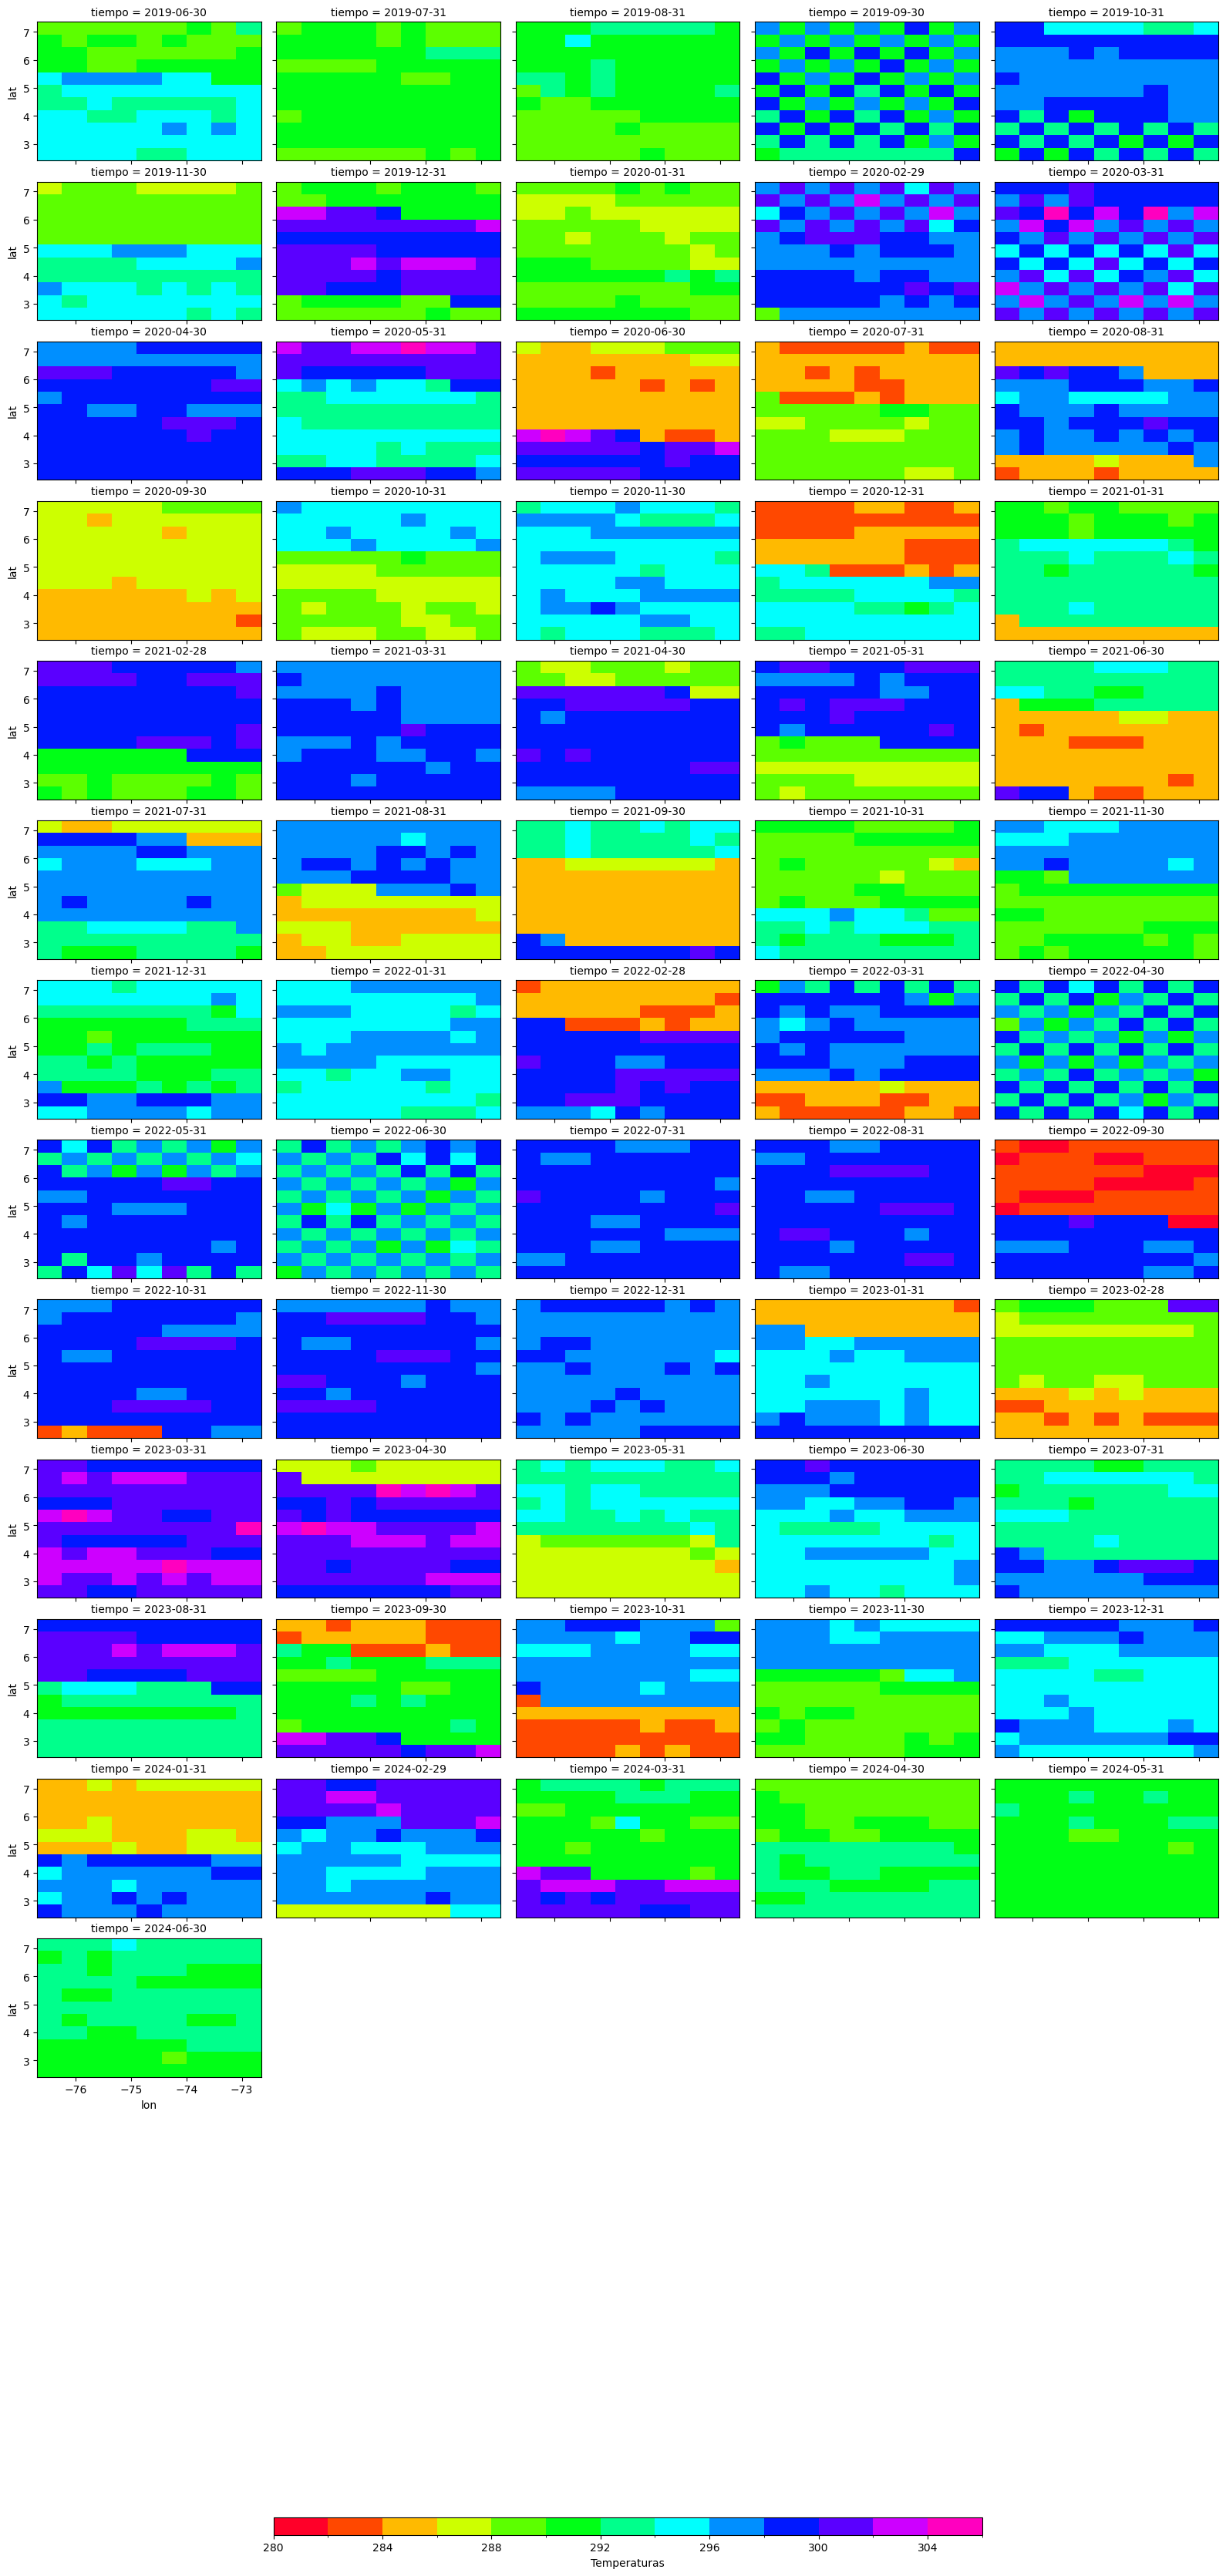

In [62]:
grilla_simple_temp = t.plot(x="lon", y="lat", col="tiempo", cmap="gist_rainbow", col_wrap=5, cbar_kwargs={"label": "Temperaturas", 'orientation':'horizontal','shrink':0.6, 'aspect':40},levels=15)

### Ahora intenta replicar los casos o ejemplos vistos en clases anteriores, para ello tome como guía los scripts vistos en clases